In [3]:
!pip install czifile
!pip install scikit-image
!pip install matplotlib

In [40]:
# Import relevant modules on python
import czifile as cz
from czifile import czi2tif
import tifffile as tf
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_minimum



In [5]:
# Converting czi files to tiff files
filepath = "UCL/Bioc0036/galactoseA.czi"
fp_czi = filepath+"czi"
fp_tiff = filepath+"tiff"

In [6]:
# Converting czi files to tiff files
file_names=["galactoseA.czi","galactoseB.czi","galactoseC.czi","glucoseA1.czi","glucoseB2.czi","glucoseC.czi"]
tiff='.tiff'
tiff_files=[]
for i in range(6):
    cz.czi2tif(file_names[i],file_names[i]+tiff)
    tiff_files.append(file_names[i]+tiff)
print(tiff_files)


Opening CZI file... 0.003839 s
Image
  axes:  TYX
  shape: (16, 512, 512)
  dtype: uint16
  size:  8.00 MiB
Creating empty TIF file... 0.069056 s
Copying image from CZI to TIF file... 0.024144 s

Opening CZI file... 0.001459 s
Image
  axes:  TYX
  shape: (15, 512, 512)
  dtype: uint16
  size:  7.50 MiB
Creating empty TIF file... 0.068267 s
Copying image from CZI to TIF file... 0.023802 s

Opening CZI file... 0.001393 s
Image
  axes:  TYX
  shape: (15, 512, 512)
  dtype: uint16
  size:  7.50 MiB
Creating empty TIF file... 0.063052 s
Copying image from CZI to TIF file... 0.022755 s

Opening CZI file... 0.002179 s
Image
  axes:  TYX
  shape: (16, 512, 512)
  dtype: uint16
  size:  8.00 MiB
Creating empty TIF file... 0.076490 s
Copying image from CZI to TIF file... 0.022775 s

Opening CZI file... 0.002074 s
Image
  axes:  TYX
  shape: (15, 512, 512)
  dtype: uint16
  size:  7.50 MiB
Creating empty TIF file... 0.068736 s
Copying image from CZI to TIF file... 0.022403 s

Opening CZI file...

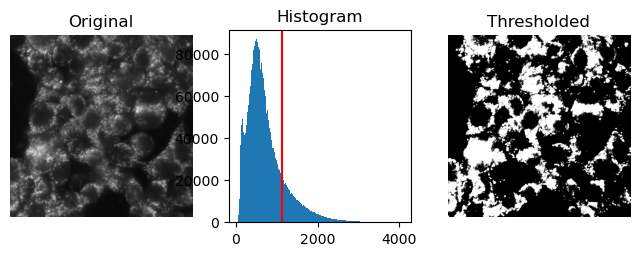

1123


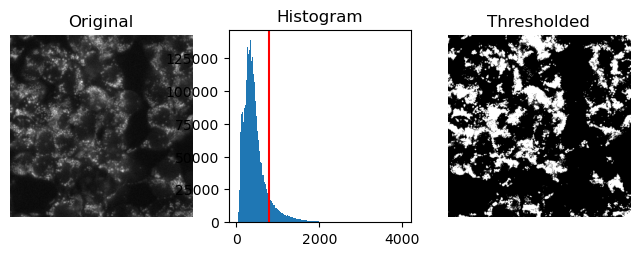

789


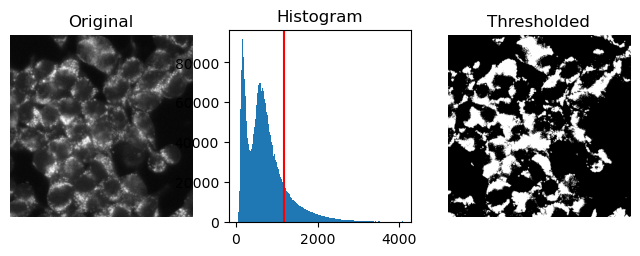

1173


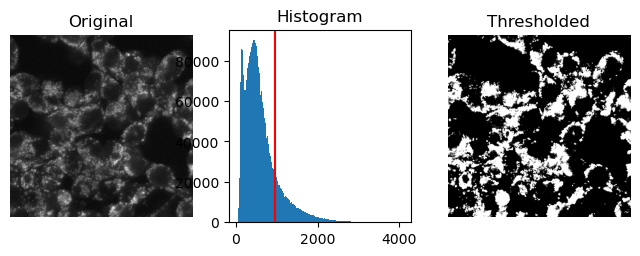

959


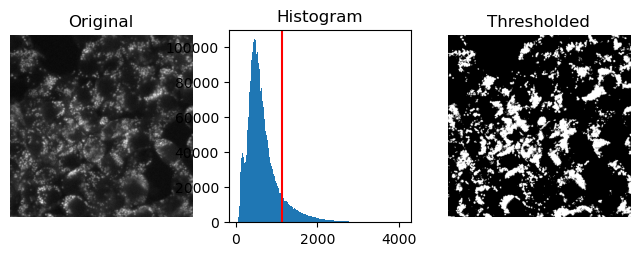

1138


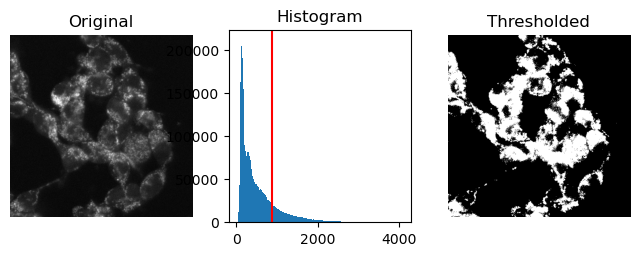

889
[1123, 789, 1173, 959, 1138, 889]


In [36]:
# Obtaining threshold value of each tiff files by using the otsu method. 
# A comparison of oringial and thresholded image was displayed.
# A histogram plot is also shown and the red line is the position of threshold.

list_thresh=[]

for i in range(6):
    image = tf.imread(tiff_files[i])
    thresh = threshold_otsu(image[10])
    img_thresh = np.where(image[10]<thresh,0,1)

    fig, ax = plt.subplots(ncols=3, figsize=(8, 2.5))

    ax[0].imshow(image[10], cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(img_thresh, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

    plt.show()
    print (thresh)
    list_thresh.append(thresh)

print (list_thresh)

In [37]:
# Calculating the average fluorescence intenisty at each 30s interval for galactose. Threshold has been applied.
int_at_time_1 = []
int_at_time_2 = []
int_at_time_3 = []
img=tf.imread(tiff_files[0])
for i in range(len(img)):
    thrsh=1123
    this_img = img[i]
    pxl_intensities_1 = this_img[this_img>thrsh]
    pxl_mn_1 = np.mean(pxl_intensities_1)
    int_at_time_1.append(pxl_mn_1)

img=tf.imread(tiff_files[1])
for i in range(len(img)):
    thrsh=789
    this_img = img[i]
    pxl_intensities_2 = this_img[this_img>thrsh]
    pxl_mn_2 = np.mean(pxl_intensities_2)
    int_at_time_2.append(pxl_mn_2)

img=tf.imread(tiff_files[2])
for i in range(len(img)):
    this_img = img[i]
    thrsh=1173
    pxl_intensities_3 = this_img[this_img>thrsh]
    pxl_mn_3 = np.mean(pxl_intensities_3)
    int_at_time_3.append(pxl_mn_3)

mean_time_gala=[]
for i in range(15):
    int_at_time=((int_at_time_1[i]+int_at_time_2[i]+int_at_time_3[i])/3)
    int_at_time=round(int_at_time,2)
    mean_time_gala.append(int_at_time)

print(mean_time_gala)



[1297.46, 1315.59, 1318.25, 1318.72, 1323.04, 1138.66, 1126.48, 1122.29, 1120.9, 1121.75, 1502.11, 1571.12, 1579.77, 1575.55, 1573.42]


In [41]:
# Calculating the standard deviation of the average of galactose's fluorescence intensity at each time point.
std_dev_list=[]
for i in range(15):
    new_list=[int_at_time_1[i],int_at_time_2[i],int_at_time_3[i]]
    new_list=[round(x,2)for x in new_list]
    std_dev = stats.stdev(new_list)
    std_dev = round(std_dev,2)
    std_dev_list.append(std_dev)

print(std_dev_list)




[89.22, 87.28, 90.19, 91.28, 94.5, 180.75, 267.01, 307.63, 341.55, 349.74, 139.13, 116.67, 96.67, 81.18, 70.28]


In [38]:
# Calculating the average fluorescence intenisty at each 30s interval for glucose. Threshold has been applied.


int_at_time_1 = []
int_at_time_2 = []
int_at_time_3 = []
img=tf.imread(tiff_files[3])
for i in range(len(img)):
    this_img = img[i]
    thrsh=959
    pxl_intensities_1 = this_img[this_img>thrsh]
    pxl_mn_1 = np.mean(pxl_intensities_1)
    int_at_time_1.append(pxl_mn_1)

img=tf.imread(tiff_files[4])
int_at_time = []
for i in range(len(img)):
    this_img = img[i]
    thrsh=1138
    pxl_intensities_2 = this_img[this_img>thrsh]
    pxl_mn_2 = np.mean(pxl_intensities_2)
    int_at_time_2.append(pxl_mn_2)

img=tf.imread(tiff_files[5])
int_at_time = []
for i in range(len(img)):
    this_img = img[i]
    thrsh=889
    pxl_intensities_3 = this_img[this_img>thrsh]
    pxl_mn_3 = np.mean(pxl_intensities_3)
    int_at_time_3.append(pxl_mn_3)
    
mean_time_glu=[]
for i in range(15):
    int_at_time=((int_at_time_1[i]+int_at_time_2[i]+int_at_time_3[i])/3)
    int_at_time=round(int_at_time,2)
    mean_time_glu.append(int_at_time)
print(mean_time_glu)

[1348.61, 1349.34, 1343.4, 1337.78, 1334.65, 1164.46, 1197.99, 1216.54, 1234.53, 1238.79, 1481.04, 1567.17, 1586.87, 1590.89, 1590.45]


In [42]:
# Calculating the standard deviation of the average of glucose's flurorescence intensity at each time point.
std_dev_list=[]
for i in range(15):
    new_list=[int_at_time_1[i],int_at_time_2[i],int_at_time_3[i]]
    new_list=[round(x,2)for x in new_list]
    std_dev = stats.stdev(new_list)
    std_dev = round(std_dev,2)
    std_dev_list.append(std_dev)

print(std_dev_list)


[89.22, 87.28, 90.19, 91.28, 94.5, 180.75, 267.01, 307.63, 341.55, 349.74, 139.13, 116.67, 96.67, 81.18, 70.28]


In [43]:
# Caluculating the difference between fluorescence intensity of glucose and galactose at each time point.
difference=[]
difference = [x - y for x, y in zip(mean_time_gala, mean_time_glu)]
difference=[round(x,2)for x in difference]
print(difference)


[-51.15, -33.75, -25.15, -19.06, -11.61, -25.8, -71.51, -94.25, -113.63, -117.04, 21.07, 3.95, -7.1, -15.34, -17.03]


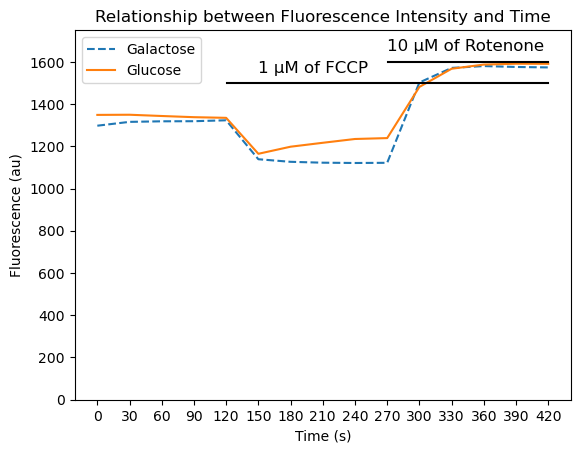

In [45]:
# Plotting a graph of average fluorescence intensity of glucose and galactose vs time with their standard deviation as error.
# The presence of FCCP and retenone is shown as well. 

sample_means = [[1297.46, 1315.59, 1318.25, 1318.72, 1323.04, 1138.66, 1126.48, 1122.29, 1120.9, 1121.75, 1502.11, 1571.12, 1579.77, 1575.55, 1573.42]
,[1348.61, 1349.34, 1343.4, 1337.78, 1334.65, 1164.46, 1197.99, 1216.54, 1234.53, 1238.79, 1481.04, 1567.17, 1586.87, 1590.89, 1590.45]]
time_points =[0,30,60,90,120,150,180,210,240,270,300,330,360,390,420]

plt.plot(time_points,sample_means[0],linestyle='dashed')
plt.plot(time_points,sample_means[1],linestyle='solid')
plt.axhline(y=1500,xmin=135/440,xmax=420/440,color='k',linestyle='solid')
plt.text(150,1550,'1 µM of FCCP',color='k',fontsize=12,rotation='horizontal')
plt.axhline(y=1600,xmin=278/440,xmax=420/440,color='k',linestyle='solid')
plt.text(270,1650,'10 µM of Rotenone',color='k',fontsize=12,rotation='horizontal')
plt.ylim(0,1750)
plt.xticks(time_points)
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (au)')
plt.title('Relationship between Fluorescence Intensity and Time')
plt.legend(['Galactose','Glucose'])

In [58]:
# Normalising sample means using min-max scalling.

def normalise_list(list):
    min_val = min(list)
    max_val = max(list)
    normalised_list = [(x - min_val) * 100 / (max_val - min_val) if max_val != min_val else 0 for x in list]
    normalised_list=[round(x,2)for x in normalised_list]
    return normalised_list

sample_means_1=[1297.46, 1315.59, 1318.25, 1318.72, 1323.04, 1138.66, 1126.48, 1122.29, 1120.9, 1121.75, 1502.11, 1571.12, 1579.77, 1575.55, 1573.42,
1348.61, 1349.34, 1343.4, 1337.78, 1334.65, 1164.46, 1197.99, 1216.54, 1234.53, 1238.79, 1481.04, 1567.17, 1586.87, 1590.89, 1590.45]
normalise_list(sample_means_1)



[37.57,
 41.42,
 41.99,
 42.09,
 43.01,
 3.78,
 1.19,
 0.3,
 0.0,
 0.18,
 81.11,
 95.79,
 97.63,
 96.74,
 96.28,
 48.45,
 48.61,
 47.34,
 46.15,
 45.48,
 9.27,
 16.4,
 20.35,
 24.18,
 25.08,
 76.63,
 94.95,
 99.14,
 100.0,
 99.91]

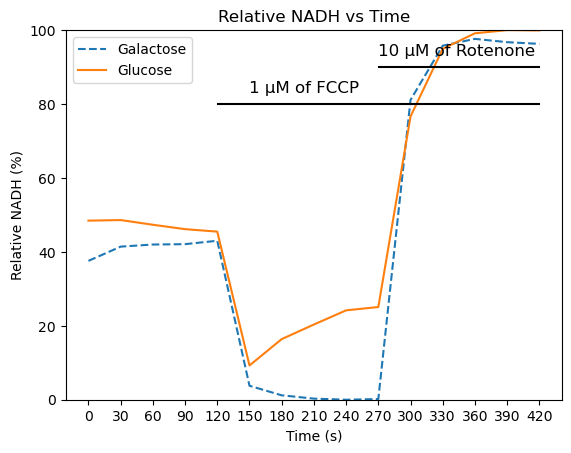

In [64]:
# Plotting the normalised fluorescence value vs time.

sample_means = [[37.57,
 41.42,
 41.99,
 42.09,
 43.01,
 3.78,
 1.19,
 0.3,
 0.0,
 0.18,
 81.11,
 95.79,
 97.63,
 96.74,
 96.28],
                [48.45,
 48.61,
 47.34,
 46.15,
 45.48,
 9.27,
 16.4,
 20.35,
 24.18,
 25.08,
 76.63,
 94.95,
 99.14,
 100.0,
 99.91]
]
time_points = [0,30,60,90,120,150,180,210,240,270,300,330,360,390,420]
plt.plot(time_points,sample_means[0],linestyle='dashed')
plt.plot(time_points,sample_means[1],linestyle='solid')
plt.axhline(y=80,xmin=135/440,xmax=420/440,color='k',linestyle='solid')
plt.text(150,83,'1 µM of FCCP',color='k',fontsize=12,rotation='horizontal')
plt.axhline(y=90,xmin=278/440,xmax=420/440,color='k',linestyle='solid')
plt.text(270,93,'10 µM of Rotenone',color='k',fontsize=12,rotation='horizontal')
plt.ylim(0,100)
plt.xticks(time_points)
plt.xlabel('Time (s)')
plt.ylabel('Relative NADH (%)')
plt.title('Relative NADH vs Time')
plt.legend(['Galactose','Glucose'])

In [62]:
# Unpaired T-test of the normalsied value of fluorescence intensity of the two sugars at resting state.
# This is to test whether the differeance in mean is significant.

from scipy import stats


gala = [37.57, 41.42, 41.99, 42.09, 43.01]
glu = [48.45,
 48.61,
 47.34,
 46.15,
 45.48,]


t_statistic, p_value = stats.ttest_ind(gala, glu)


print("t-statistic:", t_statistic)
print("p-value:", p_value)

print("Null hypthesis: There is no significant difference between the mean of normalised value of glucose and galactose.")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

t-statistic: -5.299926249320217
p-value: 0.000728453900930885
Null hypthesis: There is no significant difference between the mean of normalised value of glucose and galactose.
Reject the null hypothesis: There is a significant difference between the means.


In [63]:
# Unpaired T-test of the normalsied value of fluorescence intensity of the two sugars after rotenone is being added.
# This is to test whether the differeance in mean is significant.

from scipy import stats


gala = [81.11, 95.79, 97.63, 96.74, 96.28]
glu = [76.63, 94.95, 99.14, 100.0, 99.91]


t_statistic, p_value = stats.ttest_ind(gala, glu)


print("t-statistic:", t_statistic)
print("p-value:", p_value)

print("Null hypthesis: There is no significant difference between the mean of normalised value of glucose and galactose.")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

t-statistic: -0.1130392908233786
p-value: 0.9127845390772393
Null hypthesis: There is no significant difference between the mean of normalised value of glucose and galactose.
Fail to reject the null hypothesis: There is no significant difference between the means.


In [17]:
sample_means = [31.3, 34.24, 34.67, 34.65, 35.14, 3.0, 0.54, 0.18, 0.0, 0.15, 64.24, 75.49, 77.44, 77.33, 78.25]
sample_means_2=[56.24, 56.41, 55.07, 54.48, 53.79, 20.62, 15.76, 14.67, 14.29, 14.13, 77.95, 93.04, 97.63, 99.22, 100.0]
result = [x - y for x, y in zip(sample_means_2, sample_means)]
print(result)


[24.94, 22.169999999999995, 20.4, 19.83, 18.65, 17.62, 15.219999999999999, 14.49, 14.29, 13.98, 13.710000000000008, 17.55000000000001, 20.189999999999998, 21.89, 21.75]
